## Google QUEST Q&A Labeling

Improving automated understanding of complex question answer content


In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS 

from matplotlib_venn import venn2, venn2_unweighted
from matplotlib_venn import venn3, venn3_unweighted
%matplotlib inline

In [2]:
# reading train data from csv file
train = pd.read_csv("google-quest-challenge/train.csv")
print(train.shape)
train.head()

(6079, 41)


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [3]:
train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [4]:
# reading test data from csv file
test = pd.read_csv("google-quest-challenge/test.csv")
print(test.shape)
test.head()

(476, 11)


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [5]:
sample = pd.read_csv("google-quest-challenge/sample_submission.csv")
class_labels = list(sample.columns)[1:]
print("Number of class labels = ",len(class_labels))
class_labels

Number of class labels =  30


['question_asker_intent_understanding',
 'question_body_critical',
 'question_conversational',
 'question_expect_short_answer',
 'question_fact_seeking',
 'question_has_commonly_accepted_answer',
 'question_interestingness_others',
 'question_interestingness_self',
 'question_multi_intent',
 'question_not_really_a_question',
 'question_opinion_seeking',
 'question_type_choice',
 'question_type_compare',
 'question_type_consequence',
 'question_type_definition',
 'question_type_entity',
 'question_type_instructions',
 'question_type_procedure',
 'question_type_reason_explanation',
 'question_type_spelling',
 'question_well_written',
 'answer_helpful',
 'answer_level_of_information',
 'answer_plausible',
 'answer_relevance',
 'answer_satisfaction',
 'answer_type_instructions',
 'answer_type_procedure',
 'answer_type_reason_explanation',
 'answer_well_written']

In [6]:
input_col = list(test.columns)
input_col.remove('qa_id')
input_col

['question_title',
 'question_body',
 'question_user_name',
 'question_user_page',
 'answer',
 'answer_user_name',
 'answer_user_page',
 'url',
 'category',
 'host']

### EDA

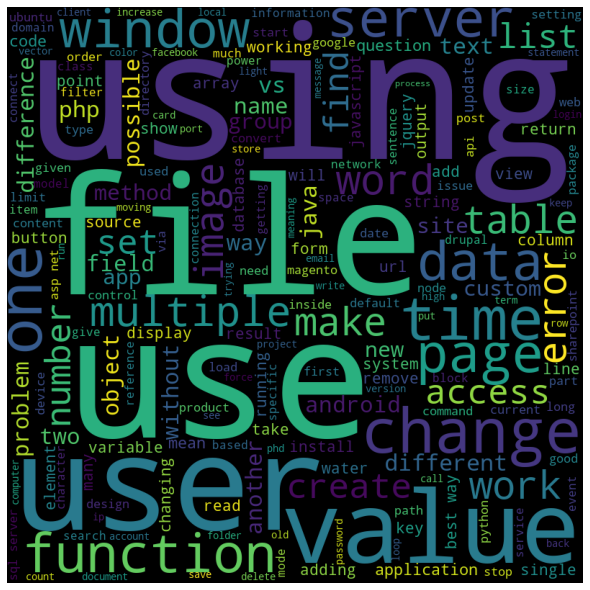

In [7]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# plotting Wordcloud of question title

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the question title 
for val in train.question_title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the above Wordcloud, it can be said that most occuring words in Question title are `using, file, use, value, user, one, time, change, window, function, data`

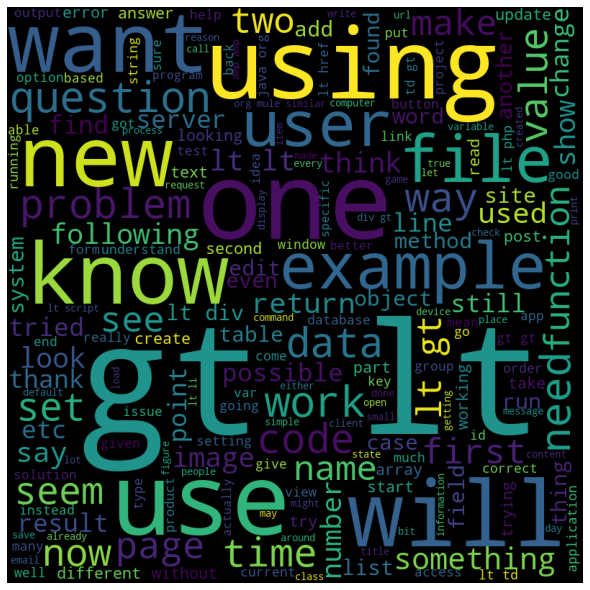

In [8]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# plotting Wordcloud of question body

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the question body  
for val in train.question_body: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the above Wordcloud, it can be said that most occuring words in Question body are `gt, lt, one, will, using, use, example,know, question, new, work, value, problem`

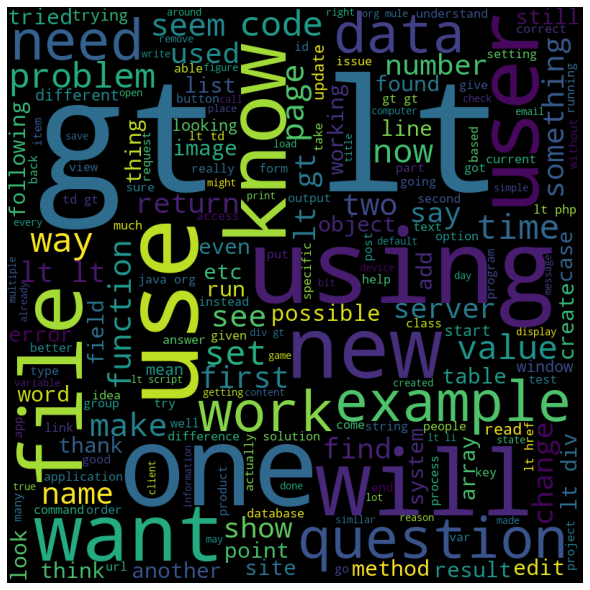

In [9]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# plotting Wordcloud of (question body + question title)

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the question title 
for val in train.question_title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

# iterate through the question body 
for val in train.question_body: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "


  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Some of the most occuring words in Question body and title combined are `gt, lt, one, will, use, file, want, example, know, question, using, new, work, problem`

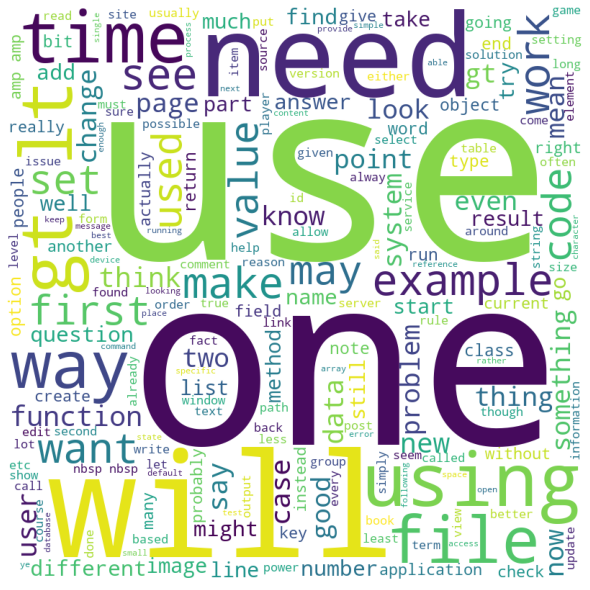

In [14]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# plotting Wordcloud of answers

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train.answer: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the above Wordcloud, it can be said that most occuring words in Question title are `use, one, will, need, gt, lt, using, file, time, gt, lt, way, make, example, see`

In [45]:
# taking set of all words in question title
q_title_set = set([word for question in train.question_title for word in question.split(' ')])

# taking set of all words in question body
q_body_set = set([word for question in train.question_body for word in question.split(' ')])

# taking set of all words in answer
answer_set = set([word for answer in train.answer for word in answer.split(' ')])

Text(0.5, 1.0, 'Venn diagram of (set of words in Question title) vs (set of words in Question body)')

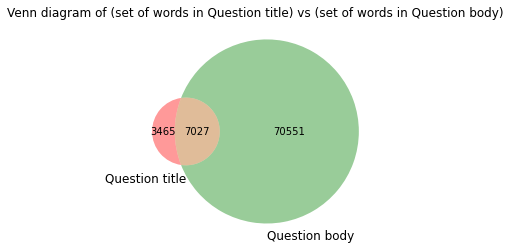

In [85]:
# https://pypi.org/project/matplotlib-venn/
# venn diagram of (set of words in Question title) vs (set of words in Question body)

venn2([q_title_set,q_body_set], set_labels=("Question title","Question body"))
plt.title("Venn diagram of (set of words in Question title) vs (set of words in Question body)")


##### There is a good overlap between Question title and Question body. Out of 10492 words in Question title, 7072 are common with Question body.

Text(0.5, 1.0, 'Venn diagram of (set of words in Answer) vs (set of words in Question body)')

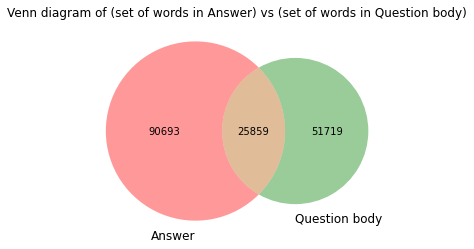

In [87]:
# venn diagram of (set of words in answer) vs (set of words in Question body)

h = venn2([answer_set,q_body_set], set_labels=("Answer","Question body"))
plt.title("Venn diagram of (set of words in Answer) vs (set of words in Question body)")


##### Out of 77578 words in Question title, 25859 words i.e. nearly 33% are common with answer.

Text(0.5, 1.0, 'Venn diagram of (set of words in Answer) vs (set of words in Question body)')

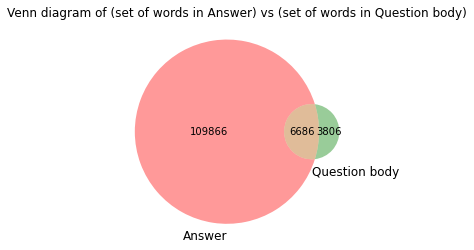

In [88]:
# venn diagram of (set of words in answer) vs (set of words in Question body)

h = venn2([answer_set,q_title_set], set_labels=("Answer","Question body"))
plt.title("Venn diagram of (set of words in Answer) vs (set of words in Question body)")


##### Answer and Question title also have a ggod overlap. Around 60% of the words in Question title are present in Answers.

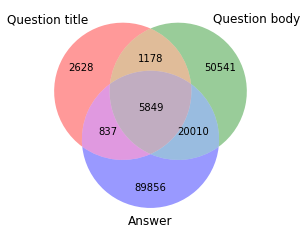

In [94]:
# venn diagram of (set of words in Question title) vs (set of words in Question body) vs (set of words in answer)
venn3_unweighted([q_title_set,q_body_set,answer_set],('Question title', 'Question body', 'Answer'))

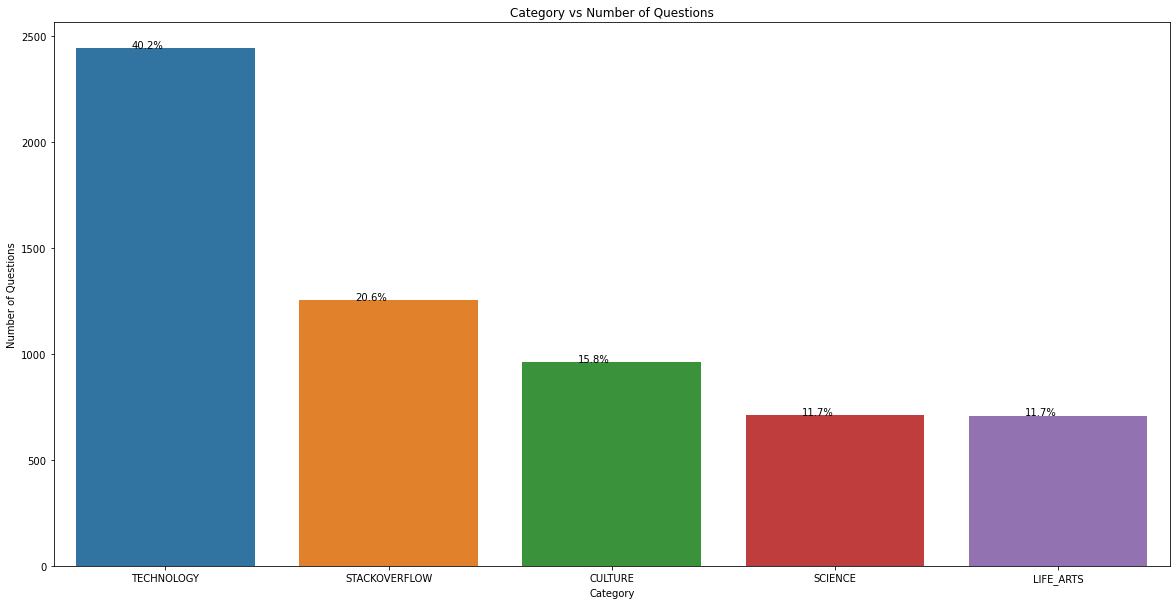

In [15]:
#plot of category count 

plt.figure(figsize=(20,10))
ax = sns.countplot(train.category, order=train.category.value_counts().index)
plt.xlabel("Category")
plt.ylabel("Number of Questions")
plt.title("Category vs Number of Questions")

total = train.shape[0]

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.25, p.get_height()))

plt.show()

##### Maximum number of questions have category `TECHNOLOGY` which is 40.2% of total number of questions.
##### 20.6% of total questions are `STACKOVERFLOW`.
##### 15.6% questions falls under `CULTURE`.
##### `SCIENCE` and `LIFE_ARTS` are minimum with 11.7% each.

In [16]:
# preprocessing host name 

train['host'] = train['host'].apply(lambda x: x.split('.')[-2])

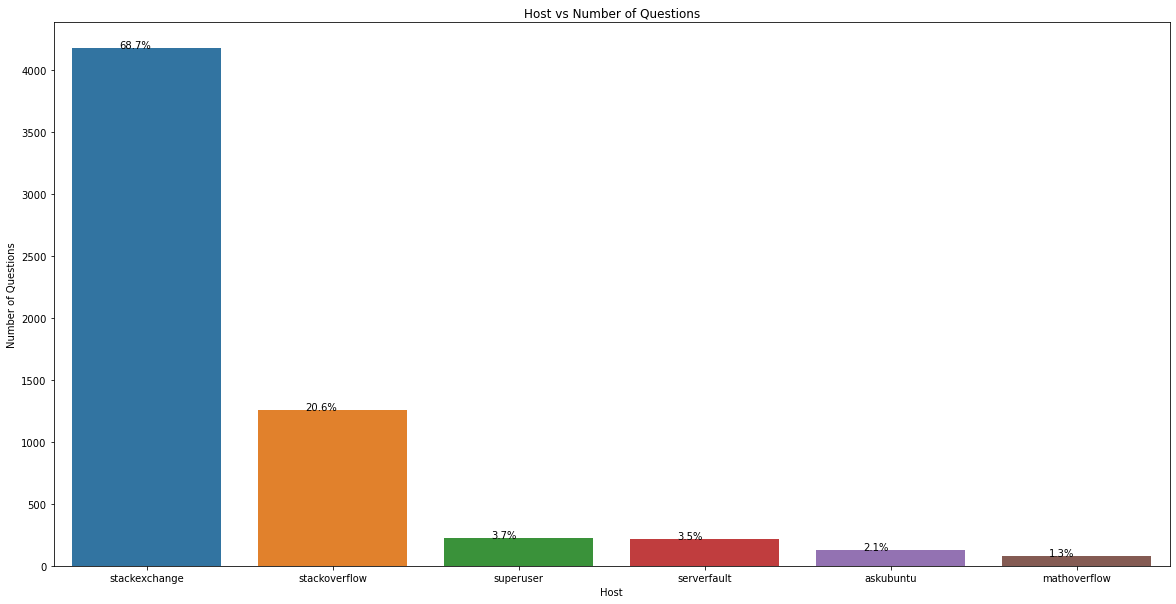

In [17]:
#plot of host count 

plt.figure(figsize=(20,10))
ax = sns.countplot(train.host, order=train.host.value_counts().index)
plt.xlabel("Host")
plt.ylabel("Number of Questions")
plt.title("Host vs Number of Questions")

total = train.shape[0]

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.25, p.get_height()))

plt.show()

##### The above plot shows that `stackexchange` hosted maximum questions with 68.6% of total questions.
##### Host with 2nd highest number of questions is `stackoverflow`.
##### Other hosts are`superuser` with 3.7%, `serverfault` with 3.5%, `askubuntu` with 2.1% and `mathoverflow` 1.3%.

In [22]:
# taking length of question title, question body, answer
train['q_title_length'] = train['question_title'].apply(lambda x: len(x.split(' ')))
train['q_body_length'] = train['question_body'].apply(lambda x: len(x.split(' ')))
train['answer_length'] = train['answer'].apply(lambda x: len(x.split(' ')))
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written,q_title_length,q_body_length,answer_length
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000,13,139,149
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889,16,144,72
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889,7,117,188
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000,8,73,258
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000,9,80,24


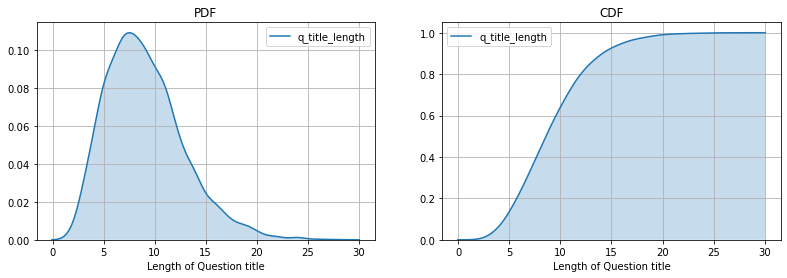

In [23]:
# kde plot of length of question title
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['q_title_length'], shade=True, ax=ax1)
plt.xlabel('Length of Question title')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['q_title_length'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Length of Question title')
plt.title('CDF')
plt.grid()
plt.show()


##### In the PDF plot, it can be observed that maximum number of questions titles have length around 7 or 8.
##### CDF plot shows that 90% of questions have length less than 15

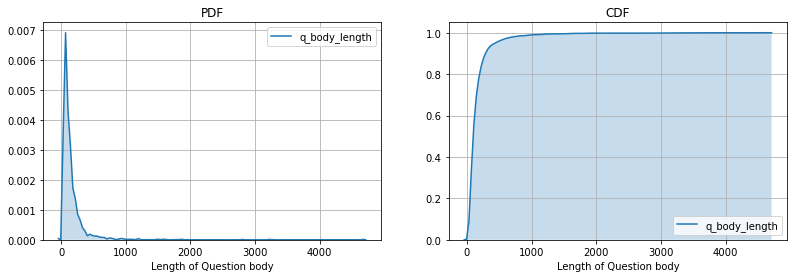

In [24]:
# kde plot of length of question title
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['q_body_length'], shade=True, ax=ax1)
plt.xlabel('Length of Question body')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['q_body_length'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Length of Question body')
plt.grid()
plt.title('CDF')

plt.show()


##### In the PDF plot, it can be observed that almost all questions body have length less than 500. But there are few questions body with length around 1000.
##### CDF plot shows that more than 90% of questions have length less than 500

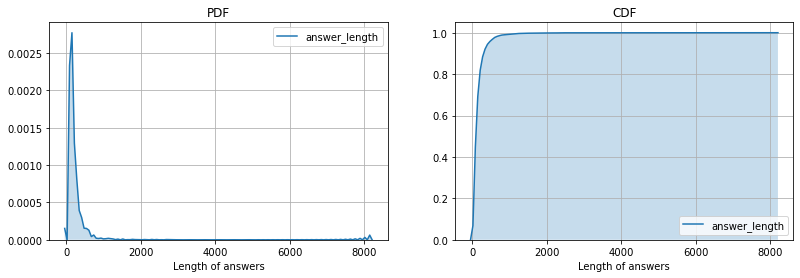

In [25]:
# kde plot of length of question title
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['answer_length'], shade=True, ax=ax1)
plt.xlabel('Length of answers')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['answer_length'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Length of answers')
plt.grid()
plt.title('CDF')

plt.show()


##### In the PDF plot, it can be observed that almost all answersy have length less than 1000. But there are few questions body with length around 2000 and even 8000.
##### CDF plot shows that more than 90% of questions have length less than 1000.

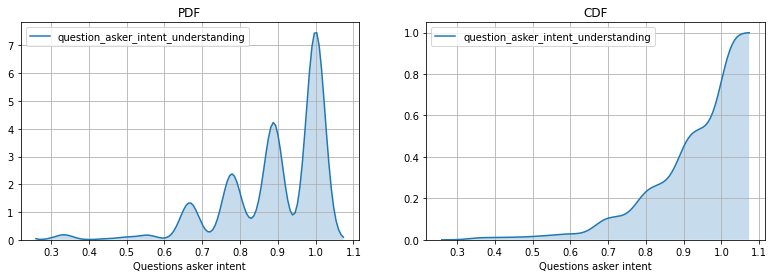

In [103]:
# kde plot of question_asker_intent_understanding
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['question_asker_intent_understanding'], shade=True, ax=ax1)
plt.xlabel('Questions asker intent')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['question_asker_intent_understanding'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Questions asker intent')
plt.grid()
plt.title('CDF')

plt.show()


##### Around 25% of the questions have intent score less than 0.8 i.e. most of the question's intent are clear upto good extent.
##### Also maximum questions have intent score around 1 and 0.9

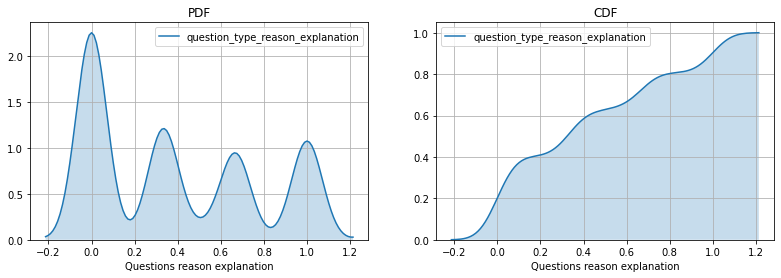

In [117]:
# kde plot of question_type_reason_explanation
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['question_type_reason_explanation'], shade=True, ax=ax1)
plt.xlabel('Questions reason explanation')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['question_type_reason_explanation'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Questions reason explanation')
plt.grid()
plt.title('CDF')

plt.show()


##### Maximum questions type have reason explanation score 0.
##### 80% of the questions have reason explanation score less than 0.8

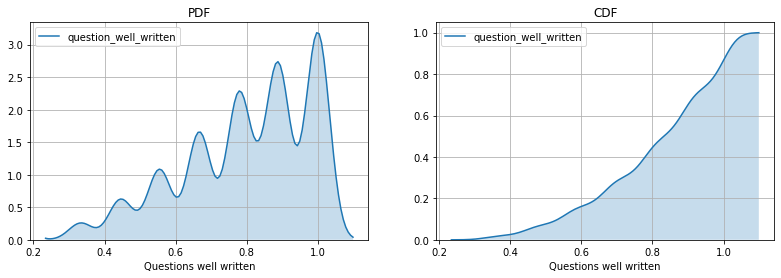

In [118]:
# kde plot of question_well_written
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['question_well_written'], shade=True, ax=ax1)
plt.xlabel('Questions well written')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['question_well_written'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Questions well written')
plt.grid()
plt.title('CDF')

plt.show()


#### Plot shows that most of the questions are well written with score between 0.8 to 1

In [123]:
# count of each score for "question_not_really_a_question"
train['question_not_really_a_question'].value_counts()

0.000000    6013
0.333333      48
0.500000      11
0.666667       4
1.000000       3
Name: question_not_really_a_question, dtype: int64

##### There are very few question who are not really a question. There are 3 questions having score 1

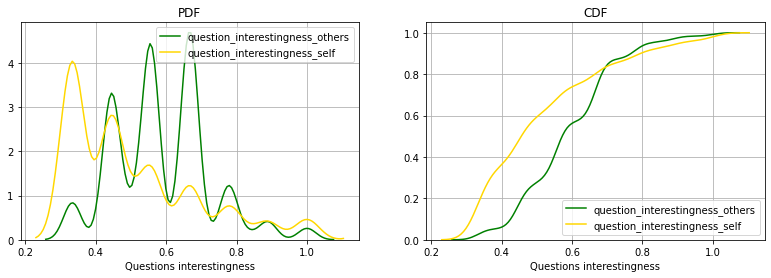

In [116]:
# kde plot of question_interestingness_others
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['question_interestingness_others'],  ax=ax1, color='green')
sns.kdeplot(train['question_interestingness_self'], ax=ax1, color='gold')
plt.xlabel('Questions interestingness')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['question_interestingness_others'], cumulative=True, ax=ax2, color = 'green')
sns.kdeplot(train['question_interestingness_self'], cumulative=True, ax=ax2, color= 'gold')
plt.xlabel('Questions interestingness')
plt.grid()
plt.title('CDF')

plt.show()


##### Most of  the questions have high score for question_interestingness_others, than question_interestingness_self  scores. That means most of the questions are more interesting to others

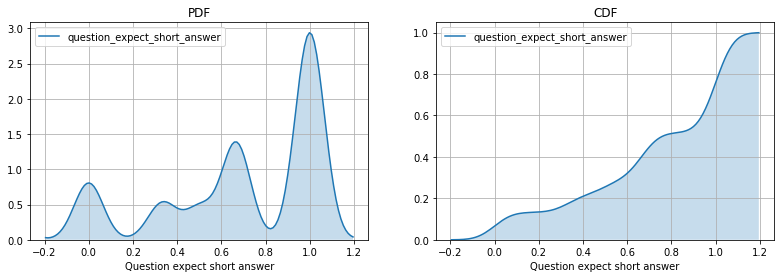

In [105]:
# kde plot of Question expect short answer
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['question_expect_short_answer'], shade=True, ax=ax1)
plt.xlabel('Question expect short answer')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['question_expect_short_answer'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Question expect short answer')
plt.grid()
plt.title('CDF')

plt.show()


##### 50% of the question_asker_intent_understanding have value less than 0.8, but most of the questions have value 1. There are few questions with value 0.

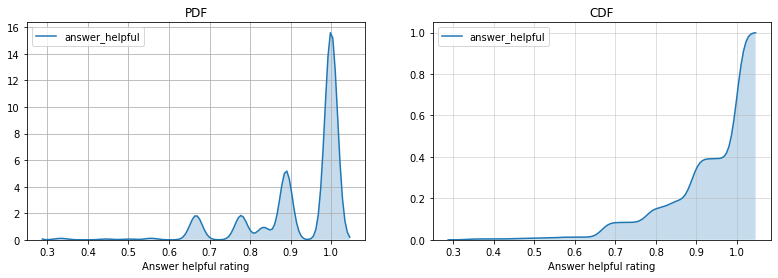

In [101]:
# kde plot of answer_helpful
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['answer_helpful'], shade=True, ax=ax1)
plt.xlabel('Answer helpful rating')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['answer_helpful'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Answer helpful rating')
plt.grid()
plt.title('CDF')

plt.show()


##### From the above plots, it can be said that most of the answers have helpful score 1. 
##### Around 35% of the answers have answer_helpful score less than 0.9

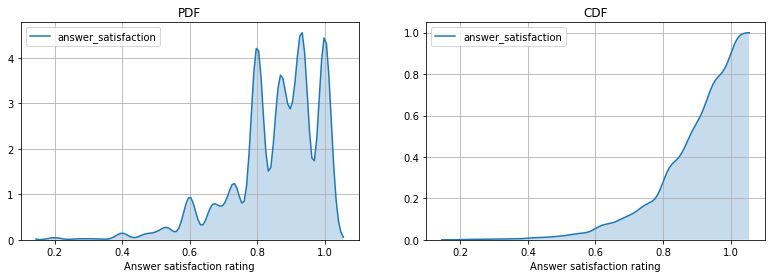

In [120]:
# kde plot of answer_satisfaction
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['answer_satisfaction'], shade=True, ax=ax1)
plt.xlabel('Answer satisfaction rating')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['answer_satisfaction'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Answer satisfaction rating')
plt.grid()
plt.title('CDF')

plt.show()


##### Only 30% of the answers have answer_satisfaction score less than 0.8.  Most of the answers have score between 0.8 to 1. So maximum number of answers are satisfactory. 

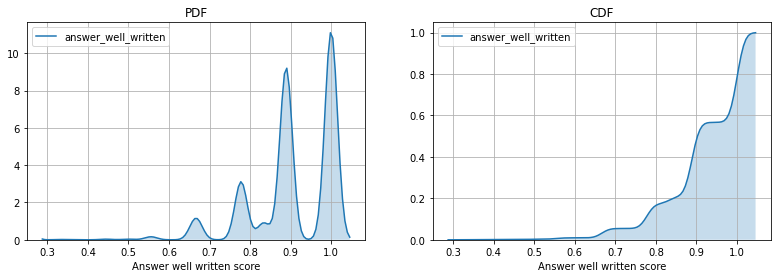

In [121]:
# kde plot of answer_well_written
fig = plt.figure(figsize=plt.figaspect(.3))

ax1 = plt.subplot(121)
sns.kdeplot(train['answer_well_written'], shade=True, ax=ax1)
plt.xlabel('Answer well written score')
plt.grid()
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(train['answer_well_written'], shade=True, cumulative=True, ax=ax2)
plt.xlabel('Answer well written score')
plt.grid()
plt.title('CDF')

plt.show()


##### Most of the questions have well written score of 0.9 and 1.
##### Only around 18% of the questions have well written score less than 0.8